# I. Set Up

In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import glob
import os
import ipywidgets as widgets
from IPython.display import clear_output
import sys
import time
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import fnmatch
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.neighbors import NearestNeighbors
import re
import pickle
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
# CIAO Imports
# CUSTOM Imports
# from data_extraction_functions import *
# from data_exploration_functions import *
# from data_representation_functions import *
def list_folders_fun(path):
    """
    DESCRIPTION: List folders in a given directory.
    INPUT: Directory path
    OUTPUT: Folder names in a given directory
    """
    folder_list = [f.name for f in Path(path).iterdir() if f.is_dir()]
    return folder_list

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Custom object hook to convert lists of lists to NumPy arrays
def numpy_hook(obj):
    if isinstance(obj, list):
        # Check if the list contains sublists (i.e. a matrix)
        if isinstance(obj[0], list):
            # Convert the list of lists to a NumPy array matrix
            return np.array(obj)
    # Return all other objects as is
    return obj

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', options=('Full', 'All', 'Full_extra', 'New', 'Bona'), value='Full')

# II. Load Data

In [2]:
# Set ID
set_id = set_widget.value
# Select Input
files = os.listdir(f'{global_path}/{set_id}/')
input_files = [f for f in files if fnmatch.fnmatch(f, 'hist2D*nE16*none*.pkl')]
input_widget = widgets.Dropdown(options=input_files[:],value=input_files[0],description='TSNE File :',disabled=False); input_widget


Dropdown(description='TSNE File :', options=('hist2D-Full-nE16-nt24-normnone.pkl',), value='hist2D-Full-nE16-n…

In [3]:
# Load the DataFrame from the CSV file
input_file = input_widget.value
# Load histogram dictionary
with open(f'{global_path}/{set_id}/{input_file}', 'rb') as f:
    hist_dict = pickle.load(f)
# Flatten histograms in the dictionary and get IDs
ids = hist_dict.keys()
histograms = hist_dict.values()
features = np.array([np.array(h).flatten() for h in histograms])
# features[np.isnan(features)] = 0.0

# Load properties
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')
df_properties_input = df_properties_input[df_properties_input['obsreg_id'].isin(list(ids))]
df_properties = df_properties_input.drop_duplicates('obsreg_id', keep='first').reset_index()

# Print eventfiles and properties number of IDs
print("Number of Features: ", len(features))
print("Number of Property Sets: ", len(df_properties))
df_properties.head()

Number of Features:  95473
Number of Property Sets:  95473


index                   name  obsreg_id   hard_hm   hard_hs   hard_ms   
0      0  2CXO J173522.0-260053  10037_123  0.354778  0.782011  0.540912  \
1      1  2CXO J173403.7-260619   10037_30  0.564647  0.999375  0.999375   
2      2  2CXO J173412.7-260548   10037_40  0.033729  0.343535  0.312305   
3      3  2CXO J173416.8-260131   10037_79  0.352280  0.801999  0.610868   
4      4  2CXO J173426.3-255911   10037_81  0.548407  0.999375  0.999375   

   var_prob_b  var_prob_h  var_prob_m  var_prob_s  var_index_b  
0    0.077612    0.092974    0.756124         NaN          0.0  
1    0.475838    0.436236    0.488032         NaN          0.0  
2    0.119011    0.438140    0.236688    0.551795          0.0  
3    0.135159    0.314770    0.834953         NaN          0.0  
4    0.299827    0.675399    0.370636         NaN          0.0

# III. TSNE

TSNE Model

In [4]:
# PCA and TSNE Setting
n_pca = 24# 15 #21 for ZStandard
n_comp = 2
perp = 30#200# 90 #80
learn_rate = 80
early_exag = 1
iterations = 1500
random_state = 11 # 27514 # 111 #  27514
init = 'random' #'random'

# Define TSNE Model
tsne_model = TSNE(n_components = n_comp , perplexity = perp, learning_rate = learn_rate, n_iter = iterations, early_exaggeration = early_exag, init=init, random_state=random_state) # rosanne 78592 #lin 27514
# PCA
pca_model = PCA(n_pca)
X_new = pca_model.fit_transform(features)
# Run TSNE Model on Data
tsne_out = tsne_model.fit_transform(X_new)
# tsne_out = tsne_model.fit_transform(features)
print(tsne_out.shape)

# Save TSNE Output
df_tsne = pd.DataFrame(tsne_out, columns=['tsne1', 'tsne2'])
df_tsne['obsreg_id'] = list(ids)
input_file = input_widget.value
data_rep = input_file.split(".pkl")[0]
df_tsne.to_csv(f'{global_path}/{set_id}/tsne-{set_id}-{data_rep}-{n_comp}D-perp{perp}-lr{learn_rate}-ee{early_exag}-it{iterations}-init{init}-PCA{n_pca}-rs{random_state}.csv', index=False)


KeyboardInterrupt: 

TSNE Convergence

In [14]:
# PCA and TSNE Setting
n_pca = 15#15 #9#15#16#25 # 20#16 #20
n_comp = 2
perp = 30#200# 90 #80
learn_rate = 80
early_exag = 1
# iterations = 2000
random_state = 11# 27514 # 111 #  27514
init = 'random' #'random'
# PCA
pca_model = PCA(n_pca)
X_new = pca_model.fit_transform(features)
# Run TSNE Model on Data
n_iter_list = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000, 6000,7500,10000]#,5500,6000,6500,7000,7500]
# n_iter_list = [6000,7500,10000]#,5500,6000,6500,7000,7500]
# n_iter_list = [4500,5000,5500,6000,6500,7000,7500,8000]
div_list = []
count = 0
total_count = len(n_iter_list)
for n_iter in n_iter_list:
    iterations = n_iter 
    tsne = TSNE(n_components=n_comp , perplexity=perp, learning_rate=learn_rate , n_iter=iterations, random_state=random_state,early_exaggeration=early_exag,init = init)
    tsne_out = tsne.fit_transform(X_new)
    df_tsne = pd.DataFrame(tsne_out, columns=['tsne1', 'tsne2'])
    df_tsne['obsreg_id'] = list(ids)
    input_file = input_widget.value
    data_rep = input_file.split(".pkl")[0]
    df_tsne.to_csv(f'{global_path}/{set_id}/tsne-{set_id}-{data_rep}-{n_comp}D-perp{perp}-lr{learn_rate}-ee{early_exag}-it{iterations}-init{init}-PCA{n_pca}-rs{random_state}.csv', index=False)
    div_list.append(tsne.kl_divergence_)
    print(iterations, tsne.kl_divergence_)
    count = count + 1
    print(f'Counter: {count} of {total_count}')
print(f'DONE!!!')

df_div =  pd.DataFrame({'iter': n_iter_list, 'div': div_list})
df_div.to_csv(f'{global_path}/{set_id}/divtsne-{set_id}-{data_rep}-{n_comp}D-perp{perp}-lr{learn_rate}-ee{early_exag}-init{init}-PCA{n_pca}-rs{random_state}-n_iter{n_iter_list[0]}-{n_iter_list[-1]}.csv', index=False)

KeyboardInterrupt: 

Plot TSNE

In [4]:
files = os.listdir(f'{global_path}/{set_id}/')
tsne_files = [f for f in files if fnmatch.fnmatch(f, 'tsne*hist2D*nE*perp30*lr80*it4500*PCA15*rs11.csv')] #PCA
tsne_files = [f for f in files if fnmatch.fnmatch(f, '*-ENCODER*2D*CNN*fc[*neck*xae**TSNE*perp40*lr100*it3000*rs2412.csv')] #AE
tsne_widget = widgets.Dropdown(options=tsne_files[:],value=tsne_files[0],description='TSNE File :',disabled=False); tsne_widget

Dropdown(description='TSNE File :', options=('XAE-ENCODER-2D-CNN-cn[32, 16]-fc[192, 48]-neck12-lr0.001-b1024-r…

In [5]:
# Load the DataFrame from the CSV file
tsne_file = tsne_widget.value
df_tsne = pd.read_csv(f'{global_path}/{set_id}/{tsne_file}')

flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687']
dips_maybe = ['13814_586','13813_218','13828_596']

# DIPS ET AL
parmar = ['10783_10','10871_10','11059_10','9070_10','9072_10'] # LMXB dips!
distefano = ['13814_567']
m101ulx = ['4736_81','6170_74','4733_229','4737_74','5300_95','5322_229','6152_81']

ieva = ['11272_13','13812_586','13812_218','9550_17','942_101','6152_79']

# FLARES ET AL 
lin = ['4062_31', '13454_56','20635_58'] 
xue = ['957_208', '3389_274','15211_38','15214_29']
irwin = ['3926_13','7800_4','7799_16','8490_30']
glennie = ['12884_10']
jonker = ['803_90']
vasquez = ['2025_39','9546_17','9548_14','12264_54','15113_59']
vasquez = ['2025_39','9548_14','15113_59']
nandra = ['9875_166', '9456_274', '5849_62']
goulding =['8636_2', '8636_3'] # last one not listed 2012 2015
NEW = ['23022_122']

flares = ['4395_992','16444_1025','13637_1078','14368_489','14368_503','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','1042_24']

tsne_lin = df_tsne.loc[df_tsne['obsreg_id'].isin(lin)]
tsne_irwin = df_tsne.loc[df_tsne['obsreg_id'].isin(irwin)]
tsne_glennie = df_tsne.loc[df_tsne['obsreg_id'].isin(glennie)]
tsne_jonker = df_tsne.loc[df_tsne['obsreg_id'].isin(jonker)]
tsne_vasquez= df_tsne.loc[df_tsne['obsreg_id'].isin(vasquez)]
tsne_xue = df_tsne.loc[df_tsne['obsreg_id'].isin(xue)]
tsne_goulding = df_tsne.loc[df_tsne['obsreg_id'].isin(goulding)]
tsne_nandra = df_tsne.loc[df_tsne['obsreg_id'].isin(nandra)]
tsne_flares = df_tsne.loc[df_tsne['obsreg_id'].isin(flares + flares_maybe)]

tsne_m101ulx = df_tsne.loc[df_tsne['obsreg_id'].isin(m101ulx)]
tsne_distefano = df_tsne.loc[df_tsne['obsreg_id'].isin(distefano)]
tsne_moredips = df_tsne.loc[df_tsne['obsreg_id'].isin(ieva + dips_maybe)]
tsne_parmar = df_tsne.loc[df_tsne['obsreg_id'].isin(parmar)] # LMXB

tsne_new = df_tsne.loc[df_tsne['obsreg_id'].isin(NEW)] 


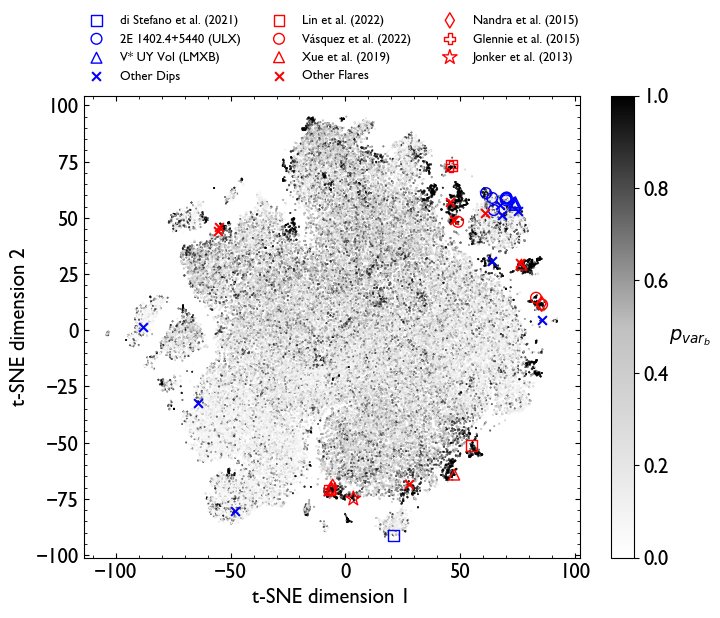

In [6]:
# Plot 3D
import matplotlib.colors as mcolors
# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
fig, axs = plt.subplots(figsize=(8, 6))
# Define the two colors for the colormap
imperial = '#003E74'
imperial2 = '#002147'
imperial3 = "#00ACD7"
darkblue = '#003170'
harvard = '#A51C30'
harvard2 = '#ed1b34'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
gold2 = '#dfc16d'
# Create a dictionary that maps values between 0 and 1 to colors
color_dict = {'red':   [(0.0, 1.0, 1.0), (1.0, 1.0, 1.0)],
              'green': [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)],
              'blue':  [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)]}
# Create the colormap using the dictionary and the two colors
cmap_h = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white', gold,harvard,'black'], N=256)
cmap_h2 = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',harvard,'black'], N=256)
cmap_gold = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',gold,'black'], N=256)
cmap_silver = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',silver2,'black'], N=256)
cmap_ic = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',silver2,imperial,'black'], N=256)
cmap_ic2 = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',imperial,'black'], N=256)
cmap_ic3 = mcolors.LinearSegmentedColormap.from_list('my_colormap', [silver2,imperial,'black'], N=256)
# fig.suptitle(tsne_file)
colourmap_var = 'viridis_r'
# colourmap_var = 'magma_r'
# colourmap_var = 'binary'
# colourmap_var = cmap_ic 
colourmap_var = cmap_silver

var_b = axs.scatter(df_tsne['tsne1'], df_tsne['tsne2'],c=df_properties['var_prob_b'], s=0.1, cmap=colourmap_var)
# var_b = axs.scatter(df_tsne['tsne1'], df_tsne['tsne2'],c=df_properties['var_index_b'], s=0.1, cmap=colourmap_var)
axs.set_xlabel('t-SNE dimension 1')
axs.set_ylabel('t-SNE dimension 2')
# axs.set_title(r'$p_{var_b}$')

sizefont2 = 14
markersize = 40
c_f = 'red'
c_d = 'blue'

axs.scatter(tsne_distefano['tsne1'], tsne_distefano['tsne2'], edgecolors=c_d, marker='s', s=markersize*1.5, facecolor='none', label='di Stefano et al. (2021)')
axs.scatter(tsne_m101ulx['tsne1'], tsne_m101ulx['tsne2'], edgecolors=c_d, marker='o', s=markersize*1.5, facecolor='none', label='2E 1402.4+5440 (ULX)')
axs.scatter(tsne_parmar['tsne1'], tsne_parmar['tsne2'], edgecolors=c_d, marker='^', s=markersize*1.5, facecolor='none', label='V* UY Vol (LMXB)')
axs.scatter(tsne_moredips['tsne1'], tsne_moredips['tsne2'], c=c_d, marker='x', s=markersize*1, facecolor='none', label='Other Dips')
 
axs.scatter(tsne_lin['tsne1'], tsne_lin['tsne2'], edgecolors=c_f, marker='s', s=markersize*1.5, facecolor='none', label='Lin et al. (2022)')
axs.scatter(tsne_vasquez['tsne1'], tsne_vasquez['tsne2'], edgecolors=c_f, marker='o', s=markersize*1.5, facecolors='none', label='Vásquez et al. (2022)')
axs.scatter(tsne_xue['tsne1'], tsne_xue['tsne2'], edgecolors=c_f, marker='^', s=markersize*1.5, facecolor='none', label='Xue et al. (2019)')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c=c_f, marker='x', s=markersize*1, facecolor='none', label='Other Flares')
axs.scatter(tsne_nandra['tsne1'], tsne_nandra['tsne2'], edgecolors=c_f, marker='d', s=markersize*1.5, facecolor='none', label='Nandra et al. (2015)')
axs.scatter(tsne_glennie['tsne1'], tsne_glennie['tsne2'], edgecolors=c_f, marker='P', s=markersize*1.5, facecolor='none', label='Glennie et al. (2015)')
axs.scatter(tsne_jonker['tsne1'], tsne_jonker['tsne2'], edgecolors=c_f, marker='*', s=markersize*3, facecolor='none', label='Jonker et al. (2013)')
# axs.scatter(tsne_goulding['tsne1'], tsne_goulding['tsne2'], edgecolors=c_f, marker='p', s=markersize*1.5, facecolor='none', label='Goulding et al. (2012)')

# axs.scatter(tsne_irwin['tsne1'], tsne_goulding['tsne2'], edgecolors=c_f, marker='d', s=markersize*1.5, facecolor='none', label='Goulding et al. (2012)')


axs.grid(False) 
cbar = axs.figure.colorbar(var_b, ax=axs)
cbar.ax.set_ylabel(r'$p_{var_b}$', rotation = 0,labelpad=15, fontsize = sizefont2)
axs.minorticks_on()
axs.tick_params(which='both', direction='in', top=True, right=True)
axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, frameon = False,fontsize=9.25)
# axs.legend(loc='upper right', bbox_to_anchor=(1., 1),frameon = False,fontsize=12)
# plt.tight_layout()

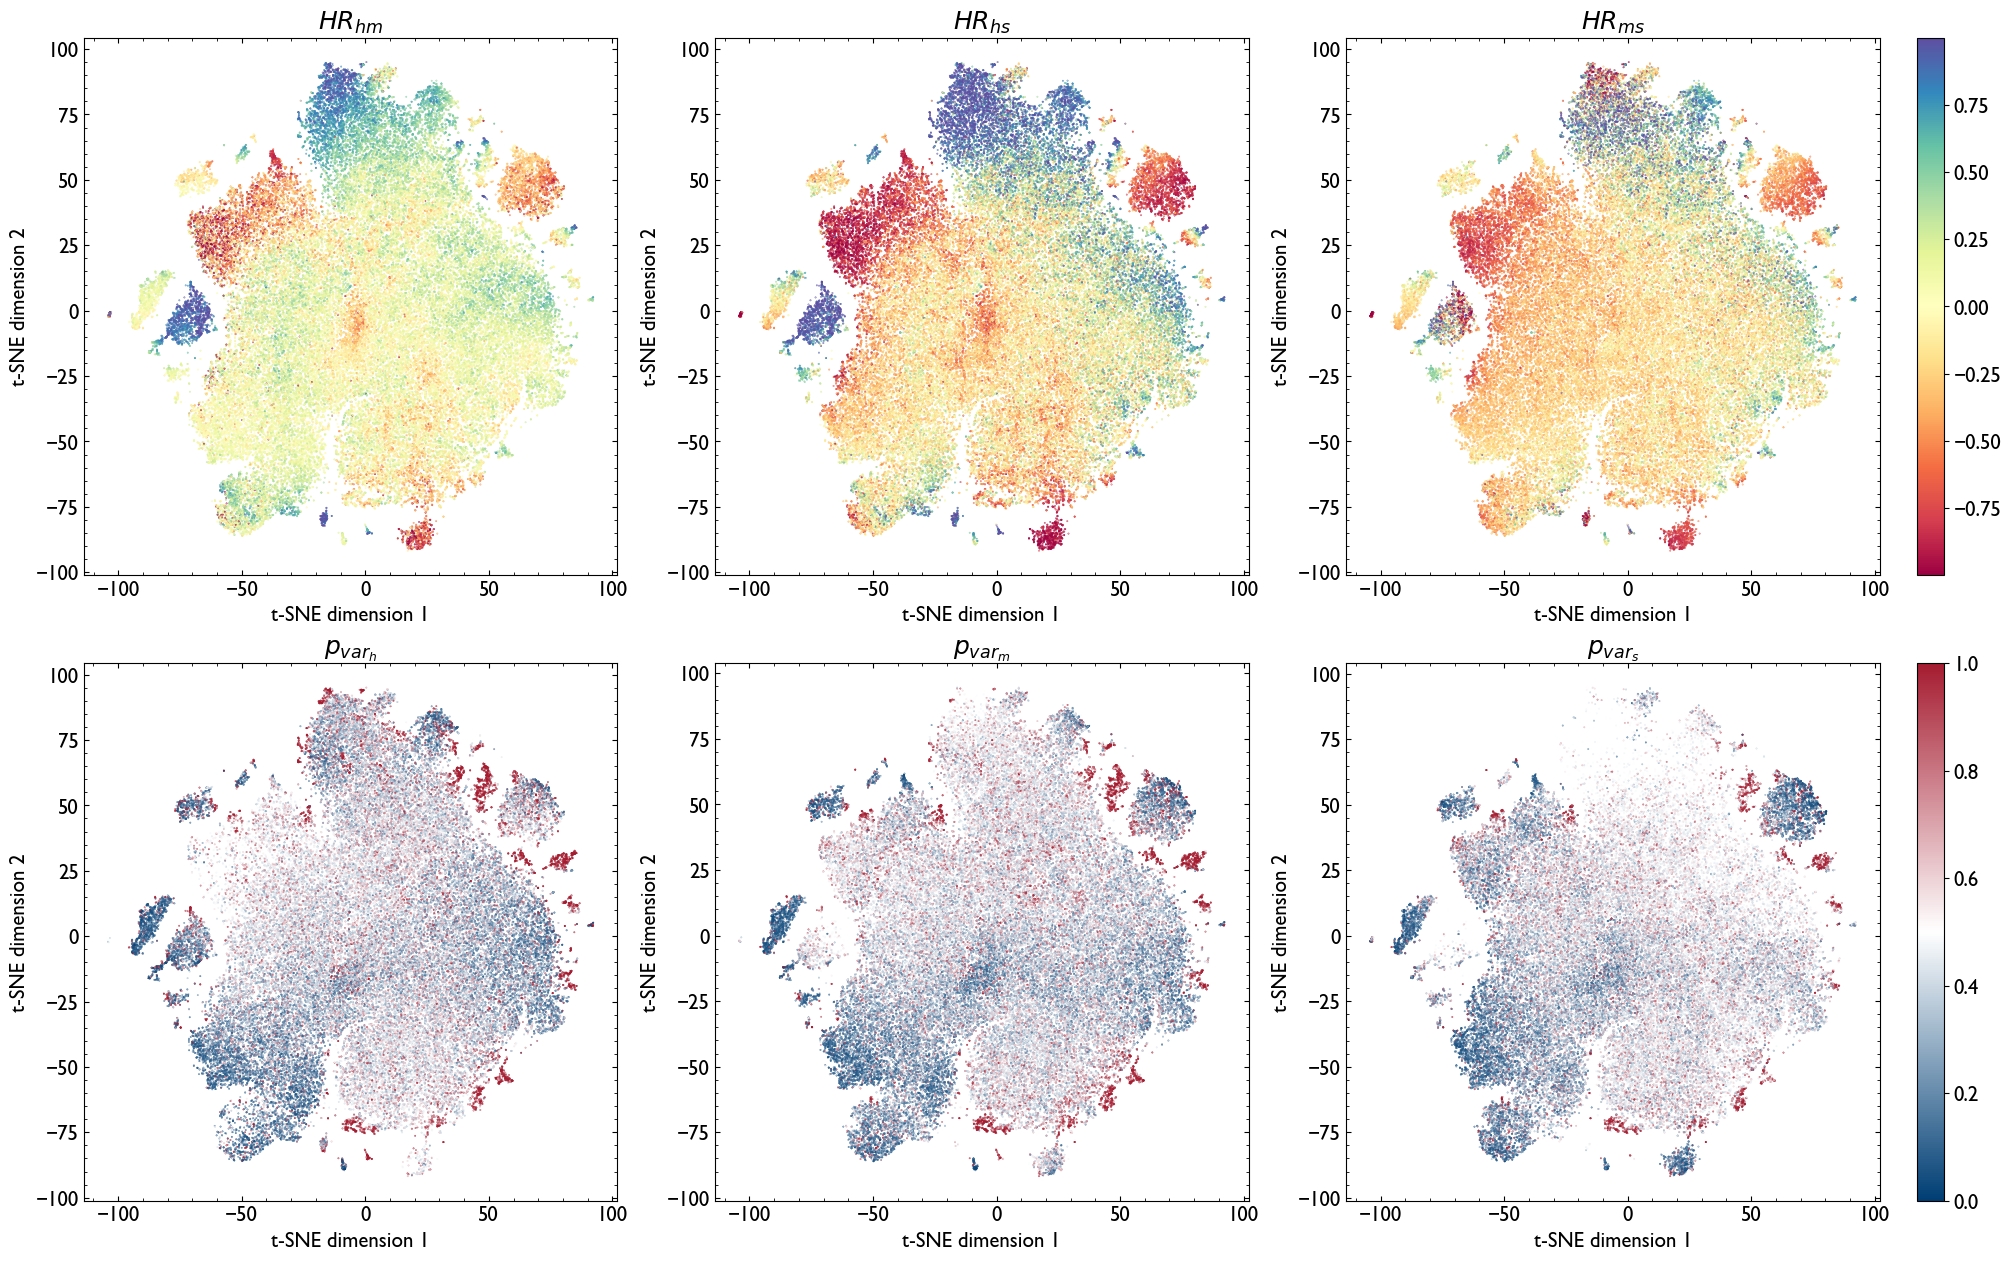

In [11]:
# Plot 2D
fig, axs = plt.subplots(2, 3, figsize=(20, 12.5),constrained_layout = True)
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
# Define the two colors for the colormap
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
gold2 = '#dfc16d'
# Create a dictionary that maps values between 0 and 1 to colors
color_dict = {'red':   [(0.0, 1.0, 1.0), (1.0, 1.0, 1.0)],
              'green': [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)],
              'blue':  [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)]}
# Create the colormap using the dictionary and the two colors
cmap_h = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white', gold,harvard,'black'], N=256)
cmap_ic = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',silver2,imperial,'black'], N=256)
cmap_hic = mcolors.LinearSegmentedColormap.from_list('my_colormap', [imperial,'white',harvard], N=256)
cmap_hic2 = mcolors.LinearSegmentedColormap.from_list('my_colormap', [harvard,'white',imperial], N=256)
cmap_hic3 = mcolors.LinearSegmentedColormap.from_list('my_colormap', [imperial,silver2,'white',gold,harvard], N=256)
cmap_hic4 = mcolors.LinearSegmentedColormap.from_list('my_colormap', [imperial,silver2,gold,harvard], N=256)
colourmap_hard ='Spectral' # 'Spectral' #'jet', 'rainbow' 'hsv
# colourmap_hard ='jet' # 'Spectral' #'jet', 'rainbow' 'hsv
colourmap_var = cmap_hic # 'bwr' #cmap_hic #'viridis_r'


hard_hm = axs[0,0].scatter(df_tsne['tsne1'], df_tsne['tsne2'],c=df_properties['hard_hm'], s=0.1, cmap=colourmap_hard)
axs[0,0].set_xlabel('t-SNE dimension 1')
axs[0,0].set_ylabel('t-SNE dimension 2')
axs[0,0].set_title(r'$HR_{hm}$')
axs[0,0].minorticks_on()
axs[0,0].tick_params(which='both', direction='in', top=True, right=True)
# cbar_hm = fig.colorbar(hard_hm, ax = axs[0,0])

hard_hs = axs[0,1].scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_properties['hard_hs'], s=0.1, cmap=colourmap_hard)
axs[0,1].set_xlabel('t-SNE dimension 1')
axs[0,1].set_ylabel('t-SNE dimension 2')
axs[0,1].set_title(r'$HR_{hs}$')
axs[0,1].minorticks_on()
axs[0,1].tick_params(which='both', direction='in', top=True, right=True)
# cbar_hs = fig.colorbar(hard_hs, ax = axs[0,1])

hard_ms = axs[0,2].scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_properties['hard_ms'], s=0.1, cmap=colourmap_hard)
axs[0,2].set_xlabel('t-SNE dimension 1')
axs[0,2].set_ylabel('t-SNE dimension 2')
axs[0,2].set_title(r'$HR_{ms}$')
axs[0,2].minorticks_on()
axs[0,2].tick_params(which='both', direction='in', top=True, right=True)
cbar_ms = fig.colorbar(hard_ms, ax = axs[0,2])

var_h = axs[1,0].scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_properties['var_prob_h'], s=0.1, cmap=colourmap_var)
axs[1,0].set_xlabel('t-SNE dimension 1')
axs[1,0].set_ylabel('t-SNE dimension 2')
axs[1,0].set_title(r'$p_{var_h}$')
axs[1,0].minorticks_on()
axs[1,0].tick_params(which='both', direction='in', top=True, right=True)
# cbar_h = fig.colorbar(var_h, ax = axs[1,0])

var_m = axs[1,1].scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_properties['var_prob_m'], s=0.1, cmap=colourmap_var)
axs[1,1].set_xlabel('t-SNE dimension 1')
axs[1,1].set_ylabel('t-SNE dimension 2')
axs[1,1].set_title(r'$p_{var_m}$')
axs[1,1].minorticks_on()
axs[1,1].tick_params(which='both', direction='in', top=True, right=True)
# cbar_m = fig.colorbar(var_m, ax = axs[1,1])
# cbar_m.ax.set_xlabel(r'$p_{var_b}$', rotation = 0,labelpad=-50)

var_s = axs[1,2].scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_properties['var_prob_s'], s=0.1, cmap=colourmap_var)
axs[1,2].set_xlabel('t-SNE dimension 1')
axs[1,2].set_ylabel('t-SNE dimension 2')
axs[1,2].set_title(r'$p_{var_s}$')
axs[1,2].minorticks_on()
axs[1,2].tick_params(which='both', direction='in', top=True, right=True)
cbar_s = fig.colorbar(var_s, ax = axs[1,2])


# for axs in axs.flatten()[0:1]:
#     axs.scatter(tsne_vasquez['tsne1'], tsne_vasquez['tsne2'], c='red', marker='x', s=100, label='Quirola-Vásquez et al. (2022) - Flares')
#     axs.scatter(tsne_lin['tsne1'], tsne_lin['tsne2'], c='red', marker='o', s=10, label='Lin et al. (2022) - Flares')
#     axs.scatter(tsne_xue['tsne1'], tsne_xue['tsne2'], c='magenta', marker='s', s=10, label='Xue et al. (2019) - Flares')
#     axs.scatter(tsne_irwin['tsne1'], tsne_irwin['tsne2'], c='green', marker='*', s=100, label='Irwin et al. (2016) - Flares')
#     axs.scatter(tsne_glennie['tsne1'], tsne_glennie['tsne2'], c='red', marker='v', s=100, label='Glennie et al. (2015) - Flares')
#     axs.scatter(tsne_jonker['tsne1'], tsne_jonker['tsne2'], c='magenta', marker='x', s=100, label='Jonker et al. (2013) - Flares')
#     axs.scatter(tsne_m101ulx['tsne1'], tsne_m101ulx['tsne2'], c='blue', marker='x', s=100, label='m101ulx')
#     axs.scatter(tsne_distefano['tsne1'], tsne_distefano['tsne2'], c='cyan', marker='x', s=100, label='di Stefano et al. (2021)')
#     axs.scatter(tsne_parmar['tsne1'], tsne_parmar['tsne2'], c='purple', marker='x', s=100, label='Parmar LMXB dips')
#     axs.legend()

plt.show()

# IV. UMAP

UMAP Model

In [68]:
# pca Setting
n_comp = 2
neighbours = 50
min_d = 5
learn_rate = 0.5
sp = 5

# PCA
n_pca = 15
pca_model = PCA(n_pca)
X_new = pca_model.fit_transform(features) 

# Define pca Model
umap_model = umap.UMAP(n_components = n_comp, n_neighbors = neighbours, min_dist = min_d, learning_rate = learn_rate, random_state=42, spread = sp)
# Run pca Model on Data
umap_out = umap_model.fit_transform(X_new)
print(umap_out.shape)

# Save pca Output
df_umap = pd.DataFrame(umap_out, columns=['umap1', 'umap2'])
df_umap['obsreg_id'] = list(ids)
input_file = input_widget.value
data_rep = input_file.split(".pkl")[0]
df_umap.to_csv(f'{global_path}/{set_id}/umap-{set_id}-{data_rep}-{n_comp}D-neighb{neighbours}-mind-{min_d}-lr{learn_rate}-sp{sp}-PCA{n_pca}.csv', index=False)



(95473, 2)


Plot UMAP

In [59]:
files = os.listdir(f'{global_path}/{set_id}/')
umap_files = [f for f in files if fnmatch.fnmatch(f, 'umap*16*')]
umap_widget = widgets.Dropdown(options=umap_files[:],value=umap_files[0],description='UMAP File :',disabled=False); umap_widget

Dropdown(description='UMAP File :', options=('umap-Full-hist2D-Full-nE16-nt24-normnone-2D-neighb50-mind-0.1-lr…

In [64]:
# Load the DataFrame from the CSV file
umap_file = umap_widget.value
df_umap = pd.read_csv(f'{global_path}/{set_id}/{umap_file}')
dip_in_blip = ['14431_16']
dips_select = ['10783_10','10871_10','11059_10','9070_10','9072_10','11272_13','10783_10','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86','11988_38','13814_586','13812_586','13828_596','13828_46']
dips_maybe = ['12992_101','12995_101','13814_586','13813_218','13814_237','13828_596']
flares_select = ['10542_331','4395_992','2227_220','16444_1025','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','9109_333','9109_344','13637_1078','14368_489','1042_24','11016_168','11737_157','12390_136']
flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687']
rosanne = ['13814_567']
ieva = ['11272_13','13812_586','13812_218','9550_17','942_101','6152_79']
caleb = ['13812_86','13813_86','793_107','808_47','4733_229','4736_81','4737_74','5322_229'] #,'4737_21','934_23','5309_17']
caleb_flares = ['1586_59','9533_24']
lin = ['4062_31', '13454_56','20635_58'] 
irwin = ['3926_13','7800_4','7799_16','8490_30']
xue = ['957_208', '3389_274']
goulding_nandra = ['9875_166', '9456_274', '5849_62', '8636_2', '8636_3'] # last one not listed
civian_marchesi = ['8021_33'] 
not_liste_xue = ['15211_44', '15211_3']

flares = df_umap.loc[df_umap['obsreg_id'].isin(flares_select+flares_maybe)]
dips = df_umap.loc[df_umap['obsreg_id'].isin(dips_select + dips_maybe)]
rosanne = df_umap.loc[df_umap['obsreg_id'].isin(rosanne + ieva )]
lin_irwin = df_umap.loc[df_umap['obsreg_id'].isin(lin + irwin + xue + goulding_nandra + civian_marchesi)]

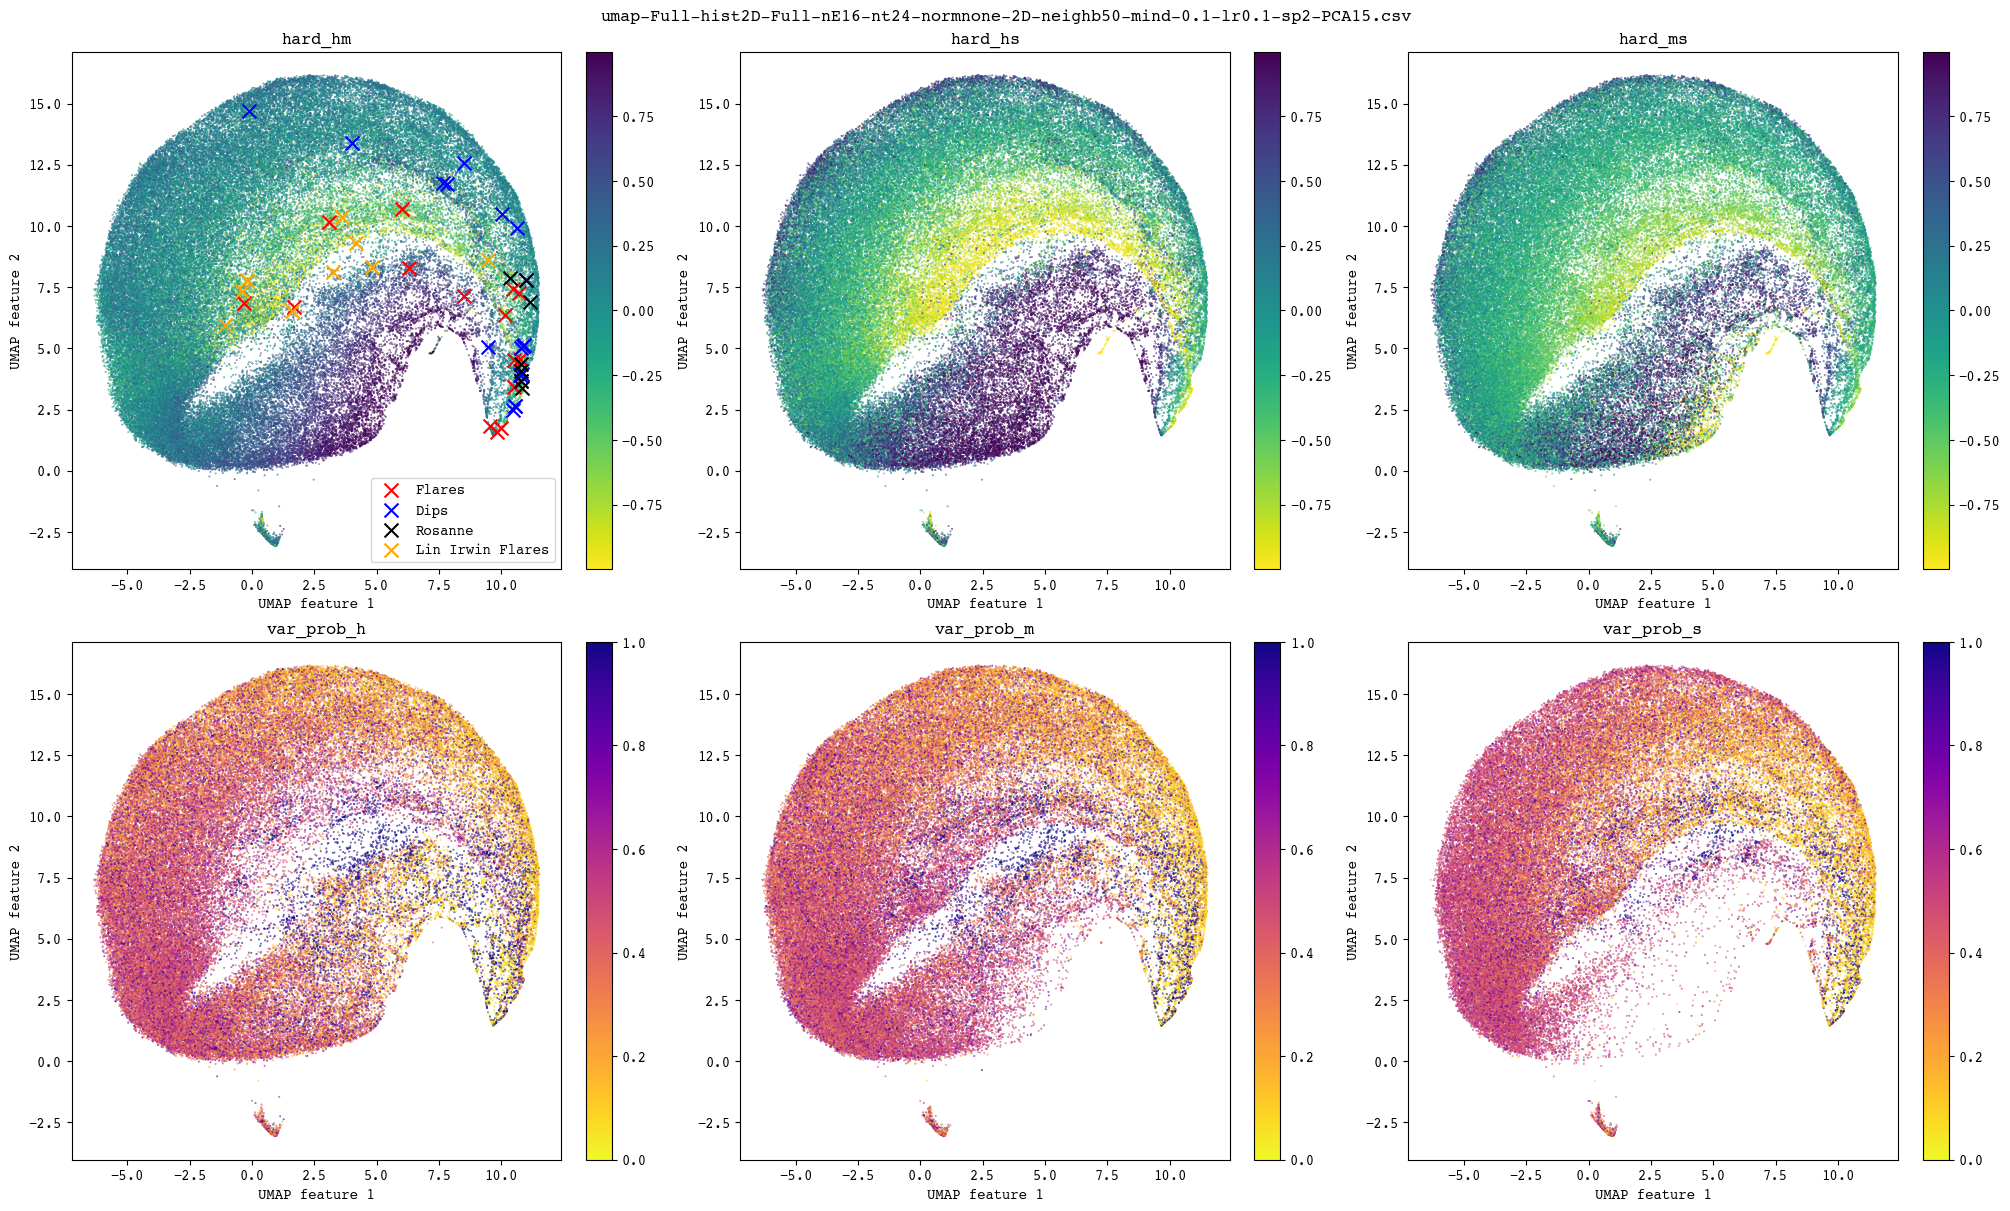

In [66]:
# Plot
fig, axs = plt.subplots(2, 3, figsize=(20, 12),constrained_layout = True)
fig.suptitle(umap_file)
colourmap_hard = 'viridis_r' #inferno 'viridis_r' 'plasma_r'
colourmap_var = 'plasma_r'

hard_hm = axs[0,0].scatter(df_umap['umap1'], df_umap['umap2'],c=df_properties['hard_hm'], s=0.1, cmap=colourmap_hard)
axs[0,0].set_xlabel('UMAP feature 1')
axs[0,0].set_ylabel('UMAP feature 2')
axs[0,0].set_title(f'hard_hm')
fig.colorbar(hard_hm, ax = axs[0,0])

hard_hs = axs[0,1].scatter(df_umap['umap1'], df_umap['umap2'], c=df_properties['hard_hs'], s=0.1, cmap=colourmap_hard)
axs[0,1].set_xlabel('UMAP feature 1')
axs[0,1].set_ylabel('UMAP feature 2')
axs[0,1].set_title(f'hard_hs')
fig.colorbar(hard_hs, ax = axs[0,1])

hard_ms = axs[0,2].scatter(df_umap['umap1'], df_umap['umap2'], c=df_properties['hard_ms'], s=0.1, cmap=colourmap_hard)
axs[0,2].set_xlabel('UMAP feature 1')
axs[0,2].set_ylabel('UMAP feature 2')
axs[0,2].set_title(f'hard_ms')
fig.colorbar(hard_ms, ax = axs[0,2])

var_h = axs[1,0].scatter(df_umap['umap1'], df_umap['umap2'], c=df_properties['var_prob_h'], s=0.1, cmap=colourmap_var)
axs[1,0].set_xlabel('UMAP feature 1')
axs[1,0].set_ylabel('UMAP feature 2')
axs[1,0].set_title(f'var_prob_h')
fig.colorbar(var_h, ax = axs[1,0])

var_m = axs[1,1].scatter(df_umap['umap1'], df_umap['umap2'], c=df_properties['var_prob_m'], s=0.1, cmap=colourmap_var)
axs[1,1].set_xlabel('UMAP feature 1')
axs[1,1].set_ylabel('UMAP feature 2')
axs[1,1].set_title(f'var_prob_m')
fig.colorbar(var_m, ax = axs[1,1])

var_s = axs[1,2].scatter(df_umap['umap1'], df_umap['umap2'], c=df_properties['var_prob_s'], s=0.1, cmap=colourmap_var)
axs[1,2].set_xlabel('UMAP feature 1')
axs[1,2].set_ylabel('UMAP feature 2')
axs[1,2].set_title(f'var_prob_s')
fig.colorbar(var_s, ax = axs[1,2])

for ax in axs.flatten()[0:1]:
    ax.scatter(flares['umap1'],flares['umap2'], c='red', marker='x', s=100, label='Flares')
    ax.scatter(dips['umap1'], dips['umap2'], c='blue', marker='x', s=100, label='Dips')
    ax.scatter(rosanne['umap1'], rosanne['umap2'], c='black', marker='x', s=100, label='Rosanne')
    ax.scatter(lin_irwin['umap1'], lin_irwin['umap2'], c='orange', marker='x', s=100, label='Lin Irwin Flares')
    ax.legend()

plt.show()

# V. PCA

In [ ]:
# Run PCA
pca_model = PCA(n_components=2)
pca_out = pca_model.fit_transform(features) 

# Save UMAP Output
df_pca = pd.DataFrame(pca_out, columns=['pca1', 'pca2'])
df_pca['obsreg_id'] = list(ids)
input_file = input_widget.value
data_rep = input_file.split(".pkl")[0]
df_pca.to_csv(f'{global_path}/{set_id}/pca-{set_id}-{data_rep}.csv', index=False)

In [ ]:
files = os.listdir(f'{global_path}/{set_id}/')
pca_files = [f for f in files if fnmatch.fnmatch(f, 'pca*')]
pca_widget = widgets.Dropdown(options=pca_files[:],value=pca_files[0],description='PCA File :',disabled=False); pca_widget

In [ ]:
# Load the DataFrame from the CSV file
pca_file = pca_widget.value
df_pca = pd.read_csv(f'{global_path}/{set_id}/{pca_file}')
# Use loc to select rows that match the IDs in list2, and store the result in a new DataFrame
flares = ['9109_333','9109_344','13637_1078','14368_489','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29']
dips = ['10783_10','10871_10','11059_10','9070_10','9072_10','13814_567','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86']
rosanne = ['13814_567']
pca_flares = df_pca.loc[df_pca['obsreg_id'].isin(flares)]
pca_dips = df_pca.loc[df_pca['obsreg_id'].isin(dips)]
pca_rosanne = df_pca.loc[df_pca['obsreg_id'].isin(rosanne)]

In [ ]:
# Plot
fig, axs = plt.subplots(2, 3, figsize=(20, 12),constrained_layout = True)
fig.suptitle(pca_file)
colourmap_hard = 'viridis_r' #inferno 'viridis_r' 'plasma_r'
colourmap_var = 'plasma_r'

hard_hm = axs[0,0].scatter(df_pca['pca1'], df_pca['pca2'],c=df_properties['hard_hm'], s=0.1, cmap=colourmap_hard)
axs[0,0].set_xlabel('pca feature 1')
axs[0,0].set_ylabel('pca feature 2')
axs[0,0].set_title(f'hard_hm')
fig.colorbar(hard_hm, ax = axs[0,0])

hard_hs = axs[0,1].scatter(df_pca['pca1'], df_pca['pca2'], c=df_properties['hard_hs'], s=0.1, cmap=colourmap_hard)
axs[0,1].set_xlabel('pca feature 1')
axs[0,1].set_ylabel('pca feature 2')
axs[0,1].set_title(f'hard_hs')
fig.colorbar(hard_hs, ax = axs[0,1])

hard_ms = axs[0,2].scatter(df_pca['pca1'], df_pca['pca2'], c=df_properties['hard_ms'], s=0.1, cmap=colourmap_hard)
axs[0,2].set_xlabel('pca feature 1')
axs[0,2].set_ylabel('pca feature 2')
axs[0,2].set_title(f'hard_ms')
fig.colorbar(hard_ms, ax = axs[0,2])

var_h = axs[1,0].scatter(df_pca['pca1'], df_pca['pca2'], c=df_properties['var_prob_h'], s=0.1, cmap=colourmap_var)
axs[1,0].set_xlabel('pca feature 1')
axs[1,0].set_ylabel('pca feature 2')
axs[1,0].set_title(f'var_prob_h')
fig.colorbar(var_h, ax = axs[1,0])

var_m = axs[1,1].scatter(df_pca['pca1'], df_pca['pca2'], c=df_properties['var_prob_m'], s=0.1, cmap=colourmap_var)
axs[1,1].set_xlabel('pca feature 1')
axs[1,1].set_ylabel('pca feature 2')
axs[1,1].set_title(f'var_prob_m')
fig.colorbar(var_m, ax = axs[1,1])

var_s = axs[1,2].scatter(df_pca['pca1'], df_pca['pca2'], c=df_properties['var_prob_s'], s=0.1, cmap=colourmap_var)
axs[1,2].set_xlabel('pca feature 1')
axs[1,2].set_ylabel('pca feature 2')
axs[1,2].set_title(f'var_prob_s')
fig.colorbar(var_s, ax = axs[1,2])

for ax in axs.flatten():
    ax.scatter(pca_flares['pca1'], pca_flares['pca2'], c='red', marker='x', s=100, label='Flares')
    ax.scatter(pca_dips['pca1'], pca_dips['pca2'], c='blue', marker='x', s=100, label='Dips')
    ax.scatter(pca_rosanne['pca1'], pca_rosanne['pca2'], c='black', marker='x', s=100, label='Rosanne')
    ax.set_xlim([-25,50])
    ax.set_ylim([-50,25])
    ax.legend()

plt.show()

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

X = X[0:5000,:]
Y = Y[0:X.shape[0],:]

# define the list of learning rates and perplexities to try
learning_rates = [10, 25, 50, 75, 100, 250, 500]
perplexities = [5, 10, 20, 30, 40, 50,75,100]
performance_matrix = np.zeros((len(learning_rates), len(perplexities)))
total_count = len(learning_rates) * len(perplexities)
counter = 0
for i, lr in enumerate(learning_rates):
    for j, perp in enumerate(perplexities):

        # Compute Xtsne embedding
        tsne = TSNE(learning_rate=lr, perplexity=perp, n_iter = 2000, early_exaggeration = 1, init='random')
        X_tsne = tsne.fit_transform(X)

        # compute pairwise distances
        dY = pdist(Y)
        dY = squareform(dY)
        #dY = scaler.fit_transform(dY)

        # # compute pairwise similarities between labels
        # label_similarities = np.zeros((Y.shape[0], Y.shape[0]))
        # for i in range(Y.shape[0]):
        #     for j in range(i+1, Y.shape[0]):
        #         correlation = np.corrcoef(Y[i,:], Y[j,:])[0,1]
        #         label_similarities[i,j] = correlation
        #         label_similarities[j,i] = correlation

        # # compute the pairwise similarity matrix for the labels JACCARD SIMILARITY
        # label_similarities2 = np.zeros((Y.shape[1], Y.shape[1]))
        # for i in range(Y.shape[0]):
        #     for j in range(i+1, Y.shape[0]):
        #         similarity = np.sum(Y[:,i] & Y[:,j]) / np.sum(Y[:,i] | Y[:,j])
        #         label_similarities[i,j] = similarity
        #         label_similarities[j,i] = similarity

        # compute pairwise distances
        dX = pdist(X_tsne)
        dX = squareform(dX)
        #dX = scaler.fit_transform(dX)

        # # compute pairwise similarities between labels
        # tsne_similarities = np.zeros((X_tsne.shape[0], X_tsne.shape[0]))
        # for i in range(X_tsne.shape[0]):
        #     for j in range(i+1, X_tsne.shape[0]):
        #         distance = np.linalg.norm(X_tsne[i,:]-X_tsne[j,:])
        #         tsne_similarities[i,j] = distance
        #         tsne_similarities[j,i] = distance

        print(dY.shape,dX.shape)
        # print(label_similarities.shape,tsne_similarities.shape)
        performance_metric = spearmanr(dY.flatten(), dX.flatten())[0]
        # performance_metric2 = spearmanr(label_similarities.flatten(), tsne_similarities.flatten())[0]
        performance_matrix[i,j] = performance_metric 
print(performance_matrix)

# save the matrix to a file
input_file = input_widget.value
data_rep = input_file.split(".pkl")[0]
with open(f'{global_path}/{set_id}/perfmatrix-{set_id}-{data_rep}-lr({learning_rates[0]},{learning_rates[-1]})-pp({perplexities[0]},{perplexities[-1]}).pkl', 'wb') as f:
    pickle.dump(performance_matrix, f)
